In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import sys


sys.path.append('..')
# Define transformations for the dataset
transform = transforms.Compose(
    [
        transforms.Grayscale(),  # Convert the image to a PyTorch tensor
        transforms.Resize((28, 28)),  # Resize the image to 28x28
        transforms.ToTensor(),  # Convert images to PyTorch tensors
        transforms.Normalize((0.5,), (0.5,)),  # Normalize images
    ]
)

# Download and load the training and test datasets
train_dataset = datasets.MNIST(
    root="./data", train=True, transform=transform, download=True
)
test_dataset = datasets.MNIST(
    root="./data", train=False, transform=transform, download=True
)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=True)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

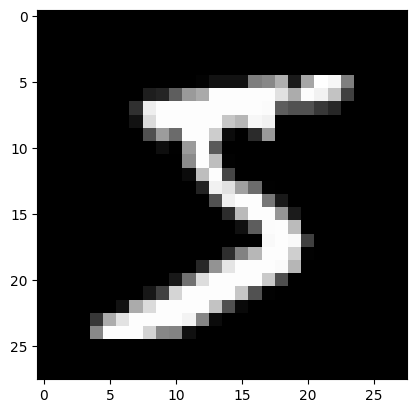

In [2]:
from vision import imshow


imshow(train_dataset[0])

In [3]:
class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()
        self.layer1 = nn.Linear(784, 128)
        self.layer2 = nn.Linear(128, 64)
        self.layer3 = nn.Linear(64, 10)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = self.layer1(x)
        x = self.relu(x)
        x = self.layer2(x)
        x = self.relu(x)
        x = self.layer3(x)
        return x

In [4]:
model = NeuralNet()
model

NeuralNet(
  (layer1): Linear(in_features=784, out_features=128, bias=True)
  (layer2): Linear(in_features=128, out_features=64, bias=True)
  (layer3): Linear(in_features=64, out_features=10, bias=True)
  (relu): ReLU()
)

In [5]:
from training import train_model

train = 0

if train:
    train_model(
        model, train_loader, nn.CrossEntropyLoss(), optim.Adam(model.parameters(), lr=0.001), num_epochs=5
    )
else:
    model.load_state_dict(torch.load(f"{type(model).__name__}_epoch_5.pth", weights_only=True))

In [6]:
from evaluation import evaluate_model


evaluate_model(model, test_loader)

Evaluating: 100%|██████████| 313/313 [00:05<00:00, 62.53it/s, current_acc=96.83%]

Final Accuracy: 96.83%


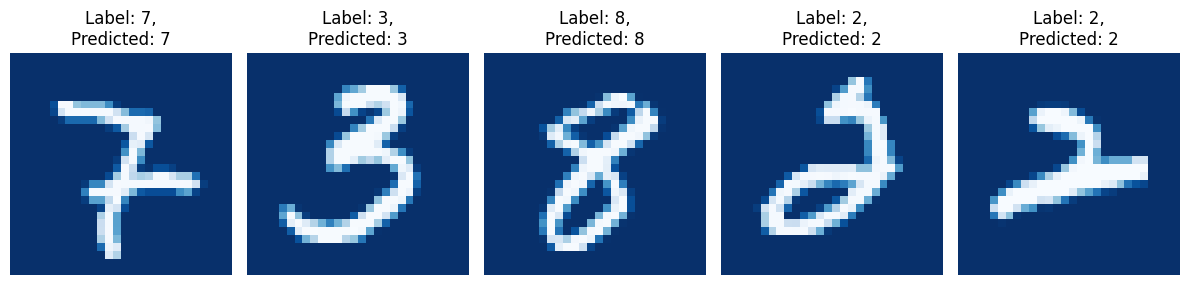

In [12]:
from vision import display_model_predictions


display_model_predictions(model, test_loader, num_images=5, cmap="Blues_r")

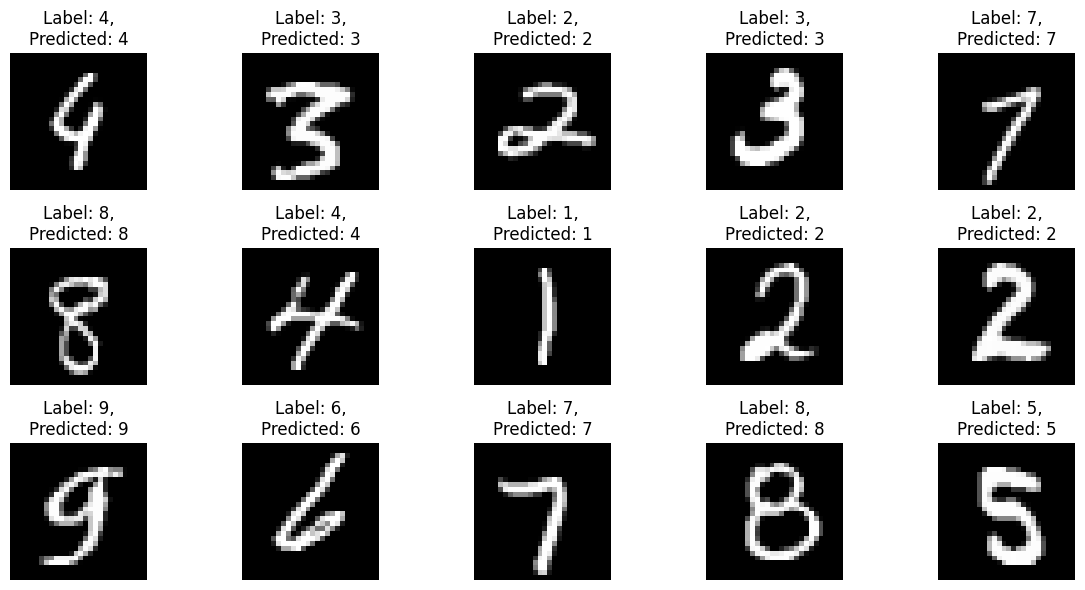

In [ ]:
display_model_predictions(model, test_loader, num_images=15)

In [11]:
from torchsummary import summary


summary(model, (1, 28, 28))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 10]             650
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (MB): 0.42
----------------------------------------------------------------
